In [ ]:
pip install yfinance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import math
import pandas as pd

import statsmodels as sm
import numpy as np
import matplotlib.pylab as plt
from matplotlib import pyplot
%matplotlib inline
from matplotlib.pylab import rcParams


In [ ]:
import yfinance as yf


data1 = yf.download('TSLA', start="2019-11-01", end="2022-10-30")
data2 = yf.download('NIO', start="2019-11-01", end="2022-10-30")
data3 = yf.download('TWTR', start="2019-11-01", end="2022-10-30")
data4 = yf.download('Meta', start="2019-11-01", end="2022-10-30")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df3 = pd.DataFrame(data3)
df4 = pd.DataFrame(data4)



In [ ]:
df1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-01,21.087999,21.098667,20.653334,20.887333,20.887333,95758500
2019-11-04,20.986668,21.462667,20.617332,21.164667,21.164667,131805000
2019-11-05,21.308001,21.567333,21.074667,21.148001,21.148001,104151000
2019-11-06,21.200001,21.781334,20.966667,21.771999,21.771999,119113500
2019-11-07,21.942667,22.766666,21.868000,22.369333,22.369333,217009500


In [ ]:
#df1['Date'] = df1.index
#df2['Date'] = df2.index
#df3['Date'] = df3.index
#df4['Date'] = df4.index


In [ ]:
df1.index

DatetimeIndex(['2019-11-01', '2019-11-04', '2019-11-05', '2019-11-06',
               '2019-11-07', '2019-11-08', '2019-11-11', '2019-11-12',
               '2019-11-13', '2019-11-14',
               ...
               '2022-10-17', '2022-10-18', '2022-10-19', '2022-10-20',
               '2022-10-21', '2022-10-24', '2022-10-25', '2022-10-26',
               '2022-10-27', '2022-10-28'],
              dtype='datetime64[ns]', name='Date', length=754, freq=None)

In [ ]:
ts1 = df1['Close']

ts1.isnull().sum()

0

In [ ]:
ts2 = df2['Close']

ts2.isnull().sum()

0

In [ ]:
ts3 = df3['Close']

ts3.isnull().sum()

0

In [ ]:
ts4 = df4['Close']

ts4.isnull().sum()

ts4.head()

Date
2019-11-01    193.619995
2019-11-04    194.720001
2019-11-05    194.320007
2019-11-06    191.550003
2019-11-07    190.419998
Name: Close, dtype: float64

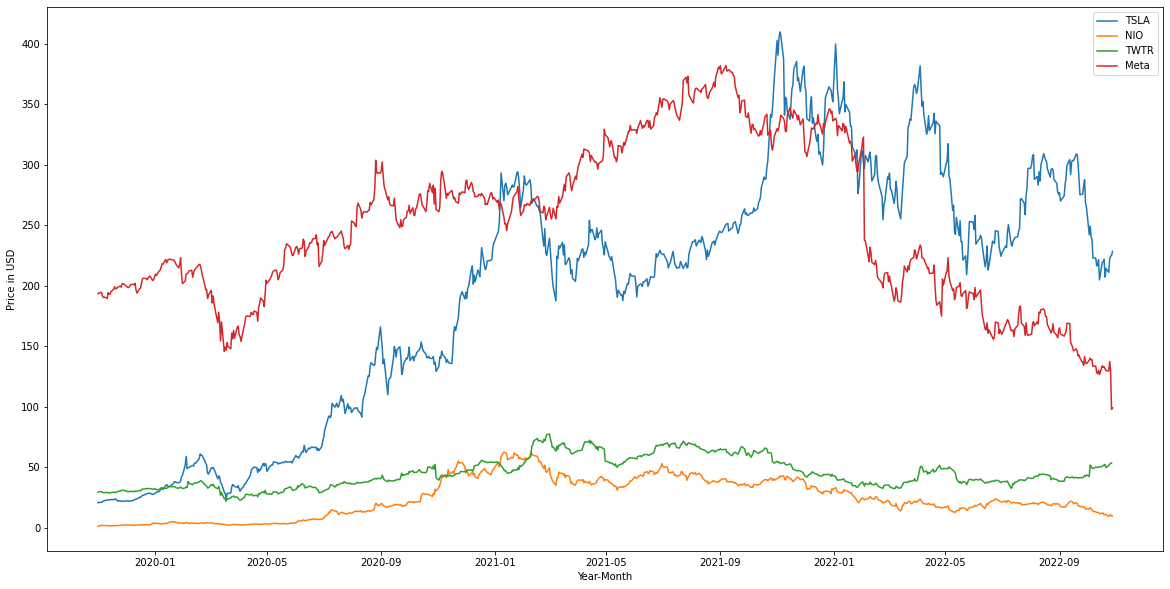

In [ ]:
plt.figure(figsize=(20,10))

plt.plot(ts1,label = 'TSLA') 
plt.plot(ts2,label = 'NIO')
plt.plot(ts3,label = 'TWTR')
plt.plot(ts4,label = 'Meta')

plt.xlabel('Year-Month')
plt.ylabel('Price in USD')
plt.legend()



In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

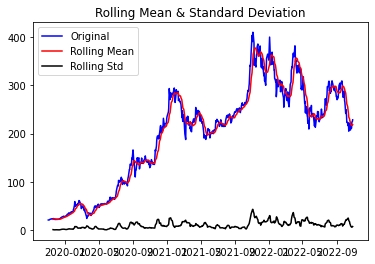

Results of Dickey-Fuller Test:
Test Statistic                  -1.799775
p-value                          0.380574
#Lags Used                      10.000000
Number of Observations Used    743.000000
Critical Value (1%)             -3.439182
Critical Value (5%)             -2.865438
Critical Value (10%)            -2.568846
dtype: float64


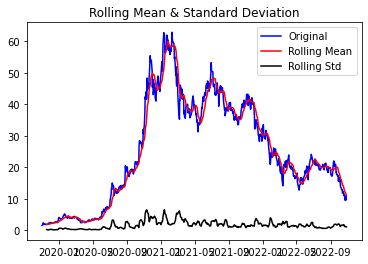

Results of Dickey-Fuller Test:
Test Statistic                  -1.440820
p-value                          0.562558
#Lags Used                       7.000000
Number of Observations Used    746.000000
Critical Value (1%)             -3.439146
Critical Value (5%)             -2.865422
Critical Value (10%)            -2.568837
dtype: float64


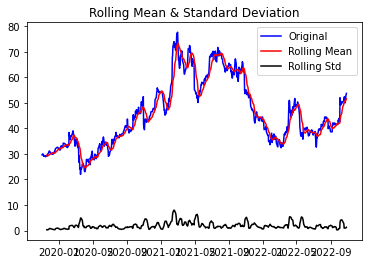

Results of Dickey-Fuller Test:
Test Statistic                  -1.942610
p-value                          0.312289
#Lags Used                       2.000000
Number of Observations Used    750.000000
Critical Value (1%)             -3.439099
Critical Value (5%)             -2.865401
Critical Value (10%)            -2.568826
dtype: float64


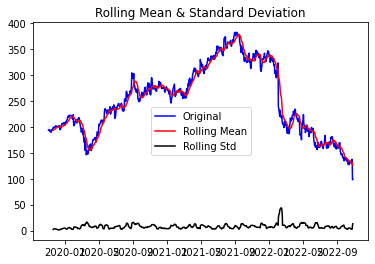

Results of Dickey-Fuller Test:
Test Statistic                  -0.511085
p-value                          0.889835
#Lags Used                       1.000000
Number of Observations Used    752.000000
Critical Value (1%)             -3.439076
Critical Value (5%)             -2.865391
Critical Value (10%)            -2.568821
dtype: float64


In [ ]:
test_stationarity(ts1)  #'TSLA' 
test_stationarity(ts2)  #'NIO'
test_stationarity(ts3)  #'TWTR'


In [ ]:
# Double log

ts1_log = np.log(ts1)
ts1_2ndlog = np.log(ts1_log)

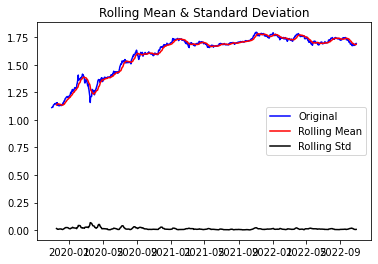

Results of Dickey-Fuller Test:
Test Statistic                  -2.923470
p-value                          0.042686
#Lags Used                       7.000000
Number of Observations Used    746.000000
Critical Value (1%)             -3.439146
Critical Value (5%)             -2.865422
Critical Value (10%)            -2.568837
dtype: float64


In [ ]:
test_stationarity(ts1_2ndlog)

In [ ]:
 # The acquisition of Twitter by Elon Musk began on April 14, 2022



#print(len(train_for_ts1))
#print(len(test_for_ts1))

#print(len(train_for_ts1)/len(ts1)*100)

#train_for_ts1.head()


617
137
81.83023872679045


Date
2019-11-01    1.111576
2019-11-04    1.115906
2019-11-05    1.115648
2019-11-06    1.125132
2019-11-07    1.133880
Name: Close, dtype: float64

In [ ]:
(train_for_ts1 == 0).sum()
train_for_ts1.isin([0]).sum()

0

In [ ]:


import warnings
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error


X = ts1_2ndlog

train, test = X[:'2022-04-13'], X['2022-04-14':]



def evaluate_arima_model(X, arima_order):
	# prepare training dataset

	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [ ]:
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))


In [ ]:
###########Ran already#############
###########Dont run again###########
####################################
import warnings 

import datetime
print(datetime.datetime.now())

p_values = [1,2,3,4,5]
q_values = [1,2,3,4]
d_values = [0,1]

warnings.filterwarnings("ignore")
evaluate_models(train, p_values, d_values, q_values)
print(datetime.datetime.now())

2022-11-10 16:35:55.125644
ARIMA(1, 0, 1) MSE=0.000
ARIMA(1, 0, 2) MSE=0.000
ARIMA(1, 0, 3) MSE=0.000
ARIMA(1, 0, 4) MSE=0.000
ARIMA(1, 1, 1) MSE=0.000
ARIMA(1, 1, 2) MSE=0.000
ARIMA(1, 1, 3) MSE=0.000
ARIMA(1, 1, 4) MSE=0.000
ARIMA(2, 0, 1) MSE=0.000
ARIMA(2, 0, 2) MSE=0.000
ARIMA(2, 0, 3) MSE=0.000
ARIMA(2, 0, 4) MSE=0.000
ARIMA(2, 1, 1) MSE=0.000
ARIMA(2, 1, 2) MSE=0.000
ARIMA(2, 1, 3) MSE=0.000
ARIMA(2, 1, 4) MSE=0.000
ARIMA(3, 0, 1) MSE=0.000
ARIMA(3, 0, 2) MSE=0.000
ARIMA(3, 0, 3) MSE=0.000
ARIMA(3, 0, 4) MSE=0.000
ARIMA(3, 1, 1) MSE=0.000
ARIMA(3, 1, 2) MSE=0.000
ARIMA(3, 1, 3) MSE=0.000
ARIMA(3, 1, 4) MSE=0.000
ARIMA(4, 0, 1) MSE=0.000
ARIMA(4, 0, 2) MSE=0.000
ARIMA(4, 0, 3) MSE=0.000
ARIMA(4, 0, 4) MSE=0.000
ARIMA(4, 1, 1) MSE=0.000
ARIMA(4, 1, 2) MSE=0.000
ARIMA(4, 1, 3) MSE=0.000
ARIMA(4, 1, 4) MSE=0.000
ARIMA(5, 0, 1) MSE=0.000
ARIMA(5, 0, 2) MSE=0.000
ARIMA(5, 0, 3) MSE=0.000
ARIMA(5, 0, 4) MSE=0.000
ARIMA(5, 1, 1) MSE=0.000
ARIMA(5, 1, 2) MSE=0.000
ARIMA(5, 1, 3) MSE=0.00

In [ ]:
#AR Model

from sklearn.metrics import mean_squared_error
from numpy.linalg import LinAlgError
import warnings
warnings.filterwarnings("ignore")

In [ ]:
history = [x for x in train]
predictions = list()
#test.reset_index()
for t in range(len(test)):
    try:
        model = ARIMA(history, order=(4,0,2))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    except (ValueError, LinAlgError):
        pass
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
rmse = mean_squared_error(test, predictions)**0.5
print('Test MSE: %.3f' % rmse)


from math import sqrt
rms = sqrt(mean_squared_error(test, predictions))

predicted=1.763192, expected=1.756828
predicted=1.757247, expected=1.760170
predicted=1.760085, expected=1.764201
predicted=1.763618, expected=1.755455
predicted=1.755190, expected=1.760937
predicted=1.760631, expected=1.760300
predicted=1.760175, expected=1.759092
predicted=1.759159, expected=1.736464
predicted=1.736089, expected=1.737483
predicted=1.735434, expected=1.736683
predicted=1.734740, expected=1.735322
predicted=1.735464, expected=1.741701
predicted=1.743155, expected=1.742921
predicted=1.743948, expected=1.751042
predicted=1.750646, expected=1.735832
predicted=1.734912, expected=1.734284
predicted=1.733008, expected=1.717351
predicted=1.716321, expected=1.720272
predicted=1.719280, expected=1.704729
predicted=1.704346, expected=1.703236
predicted=1.702575, expected=1.713302
predicted=1.712496, expected=1.702325
predicted=1.702770, expected=1.711421
predicted=1.711613, expected=1.698618
predicted=1.698595, expected=1.698517
predicted=1.697319, expected=1.686310
predicted=1.

In [ ]:
print(len(test))
print(len(train))
print(len(history))
print(len(predictions))

137
617
754
137


In [ ]:
from math import sqrt
rms = sqrt(mean_squared_error(np.exp(np.exp(test)), np.exp(np.exp(predictions))))
print('Mean Squarred Error: %.2f'% rms)

print('Mean : %.2f'%(np.exp(np.exp(test))).mean())


#First we check the mean value of the data set which comes out to be 263.21
#And the root mean squared error for this particular model should come to around 10.48. 
#Also you should care about is that your root mean squared should be very smaller than the mean value of test set. 
#In this case we can see the average error is gonna be roughly 10.48/263.21 *100 = 3.98% of the actual value.

Mean Squarred Error: 10.49
Mean : 263.68


In [ ]:
start = len(train)
end = len(train)+len(test)-1


prediction_model = pd.DataFrame(model_fit.predict(start=start,end=end,typ='levels'))

prediction_model.index=X.index[start:end+1]

np.exp(np.exp(prediction_model))

,0
Date,
2022-04-14,340.518963
2022-04-18,329.349401
2022-04-19,334.356108
2022-04-20,341.371730
2022-04-21,325.514871
...,...
2022-10-24,213.900360
2022-10-25,209.771683
2022-10-26,221.327939


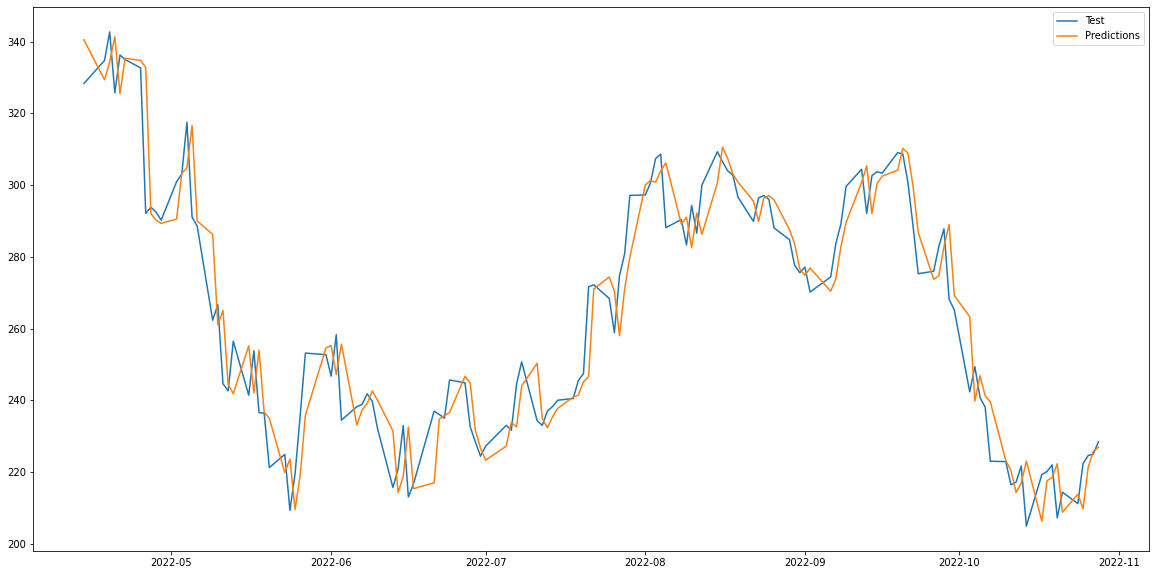

In [ ]:
plt.figure(figsize=(20,10))
#plt.plot(train, label='Training')
plt.plot(np.exp(np.exp(test)), label='Test')
plt.plot(np.exp(np.exp(prediction_model)), label='Predictions')
plt.legend(loc = 'Left corner')
plt.show()

                     0
2022-10-28  226.967406
2022-10-29  227.100820
2022-10-30  225.557134
2022-10-31  224.191629
2022-11-01  224.167760
2022-11-02  224.926277
2022-11-03  225.225502
2022-11-04  224.634135
2022-11-05  223.785014
2022-11-06  223.416589
2022-11-07  223.562607
2022-11-08  223.703616
2022-11-09  223.461361
2022-11-10  222.965071
2022-11-11  222.580326
2022-11-12  222.458015
2022-11-13  222.431458
2022-11-14  222.276469
2022-11-15  221.964600
2022-11-16  221.642042
2022-11-17  221.428177
2022-11-18  221.296007
2022-11-19  221.139340
2022-11-20  220.906321
2022-11-21  220.640269
2022-11-22  220.408587
2022-11-23  220.224853
2022-11-24  220.048586
2022-11-25  219.842439
2022-11-26  219.611035
2022-11-27  219.385019
2022-11-28  219.181655
2022-11-29  218.990027
2022-11-30  218.790038


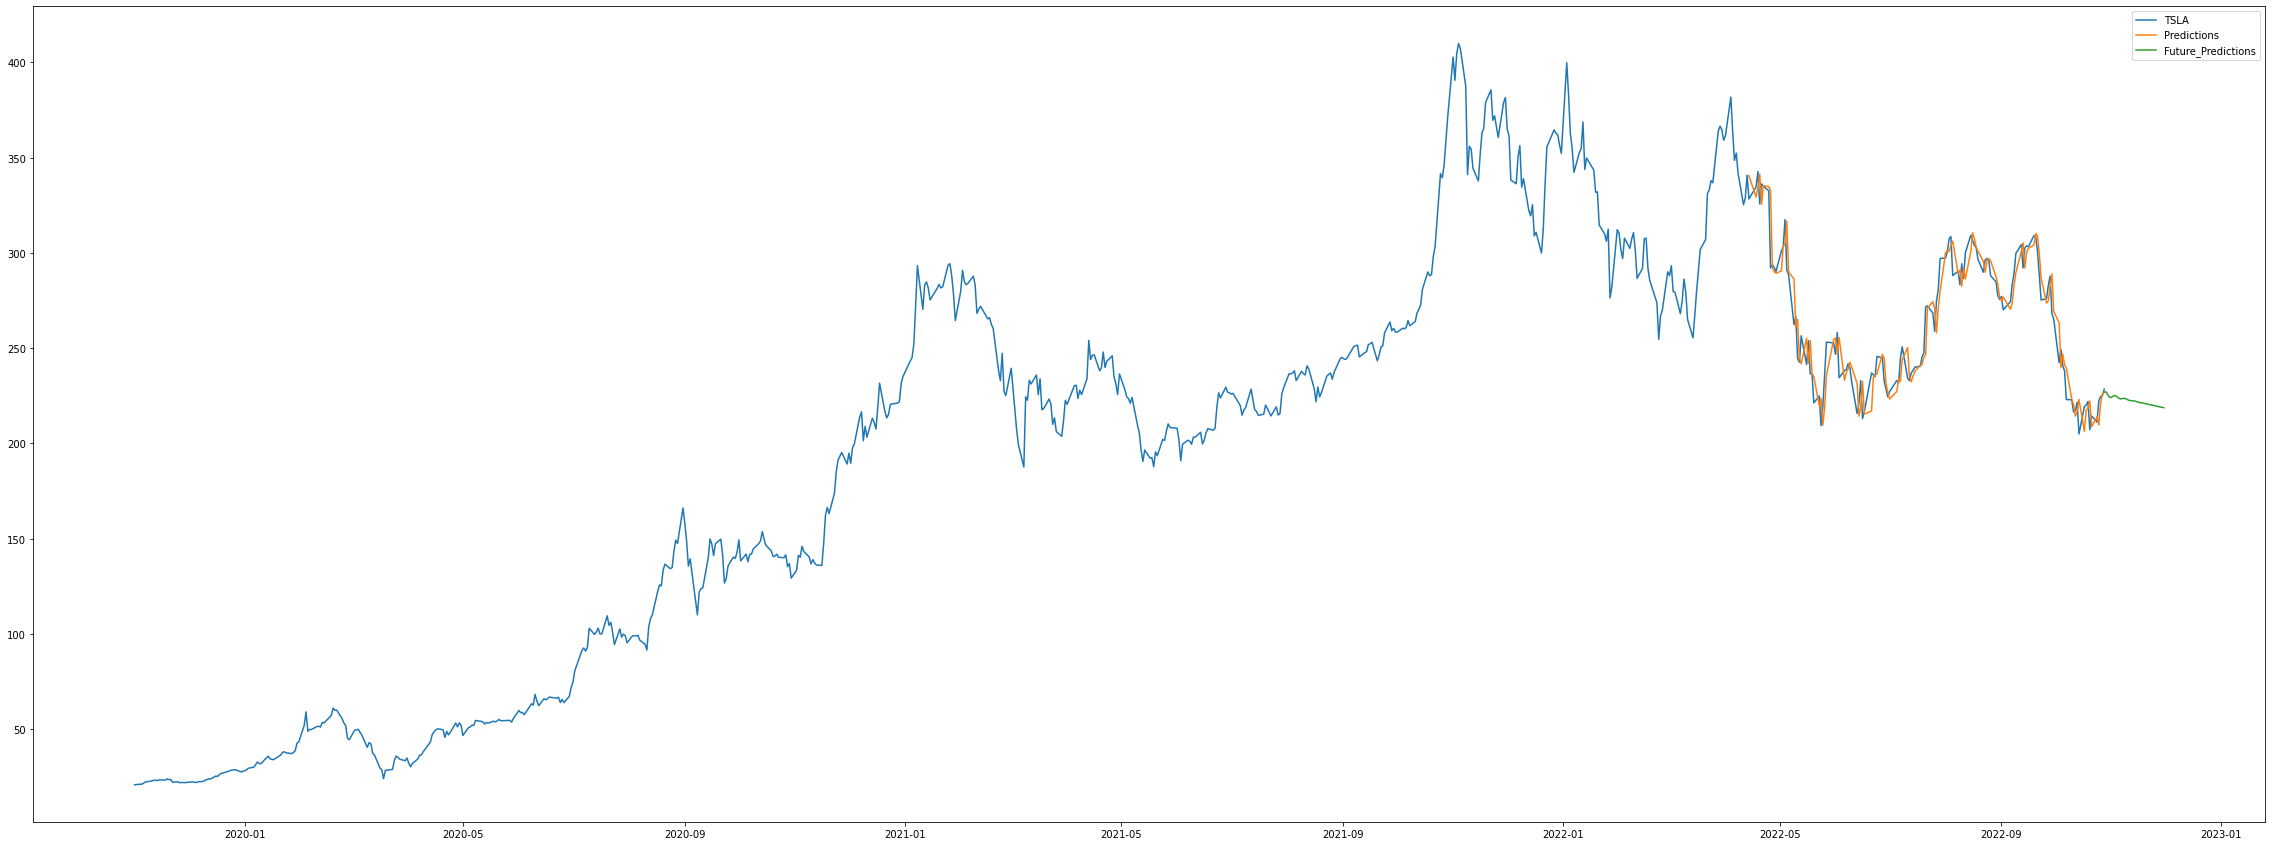

In [ ]:
index_future_dates=pd.date_range(start='2022-10-28',end='2022-11-30')


future_prediction_model = pd.DataFrame(model_fit.predict(start=len(X),end=len(X)+32,typ='levels'))

future_prediction_model.index = index_future_dates

print(np.exp(np.exp(future_prediction_model)))

plt.figure(figsize=(40,15))

plt.plot(ts1,label = 'TSLA') 


plt.plot(np.exp(np.exp(prediction_model)), label='Predictions')

plt.plot(np.exp(np.exp(future_prediction_model)), label='Future_Predictions')



plt.legend(loc = 'Left corner')
plt.show()
